### Data Set Enfermedades Cardiacas

El campo "objetivo" se refiere a la presencia de enfermedad cardíaca en el paciente. Tiene un valor entero 0 = sin enfermedad y 1 = enfermedad.

| **target** | Diagnóstico de enfermedad cardíaca | Binario | 0 = No enfermedad, 1 = Enfermedad |

## Variables del Dataset Cardíaco

| Nombre Variable | Descripción | Tipo de Dato | Valores/Rango |
|-----------------|-------------|--------------|---------------|
| **edad** | Edad del paciente | Entero | Edad en años |
| **sexo** | Género del paciente | Binario | 1 = Hombre, 0 = Mujer |
| **cp** | Tipo de dolor torácico | Categórico | 1 = Angina típica<br>2 = Angina atípica<br>3 = Dolor no anginoso<br>4 = Asintomático |
| **trestbps** | Presión arterial en reposo | Continuo | mm Hg |
| **chol** | Colesterol sérico | Continuo | mg/dl |
| **fbs** | Glucemia en ayunas | Binario | 1 = >120 mg/dl, 0 = ≤120 mg/dl |
| **restecg** | Resultados electrocardiográficos en reposo | Categórico | 0 = Normal<br>1 = Anomalía ST-T<br>2 = Hipertrofia ventricular |
| **thalach** | Frecuencia cardíaca máxima alcanzada | Entero | Latidos por minuto |
| **exang** | Angina inducida por ejercicio | Binario | 1 = Sí, 0 = No |
| **oldpeak** | Depresión del segmento ST inducida por ejercicio | Continuo | Medido en mm |
| **slope** | Pendiente del segmento ST en ejercicio máximo | Categórico | 1 = Ascendente<br>2 = Plana<br>3 = Descendente |
| **ca** | Número de vasos principales coloreados | Entero | 0-3 |
| **thal** | Resultado del test de talio | Categórico | 0 = Normal<br>1 = Defecto fijo<br>2 = Defecto reversible |
| **target** | Diagnóstico de enfermedad cardíaca | Binario | 0 = No enfermedad, 1 = Enfermedad |


Importar Librerias

In [328]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import ydata_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

Cargar Archivo

In [329]:
# Cargamos la base de datos 'heart.csv'
heart = pd.read_csv(r'C:\Users\Dc\Documents\Maestría_Data_Science\Fundamentos_IA\Final_IA\heart.csv')
#showing the first rows 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


EDA

In [330]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [331]:
heart.shape
#showing the columns of the dataset

(1025, 14)

In [332]:
heart.columns   
#showing the data types of the columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [333]:
#showing the data types of the columns
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [334]:
#showing the number of null values in each column
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [335]:
heart.nunique()
#showing the statistical summary of the dataset

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [336]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\Dc\AppData\Local\Temp\ipykernel_22228\1953424374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart, palette={'No Disease': "#668ba4", 'Disease': "#313491"})


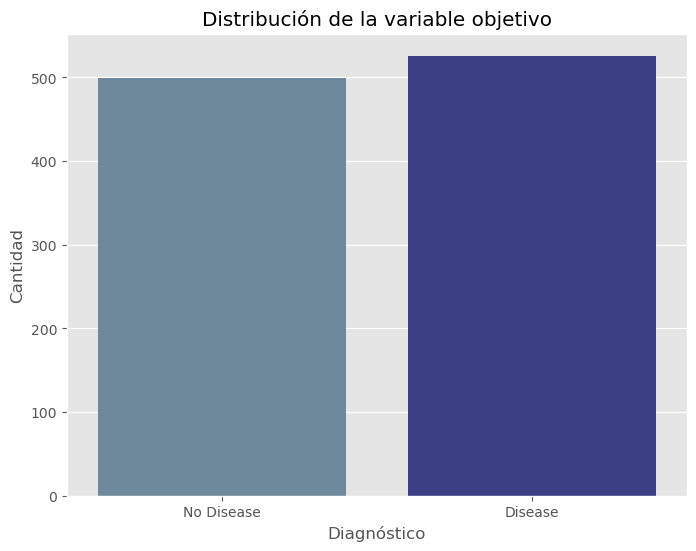

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'target' sea de tipo categórico
heart['target'] = heart['target'].map({0: 'No Disease', 1: 'Disease'})

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart, palette={'No Disease': "#668ba4", 'Disease': "#313491"})
plt.title('Distribución de la variable objetivo')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()



### Modelo Random Forest

In [338]:
# Dividir datos en características (X) y objetivo (y)
X = heart.drop('target', axis=1)  # Asumiendo que 'target' es la variable objetivo
y = heart['target']

In [339]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [340]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, 
                                max_depth=5, 
                                random_state=42,
                                class_weight='balanced')  # Útil si hay desbalance de clases

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [341]:
# Evaluar el modelo
y_pred_rf = rf_model.predict(X_test)

print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))


Precisión del modelo: 0.8928571428571429

Reporte de clasificación:
              precision    recall  f1-score   support

     Disease       0.86      0.93      0.89       149
  No Disease       0.93      0.86      0.89       159

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308



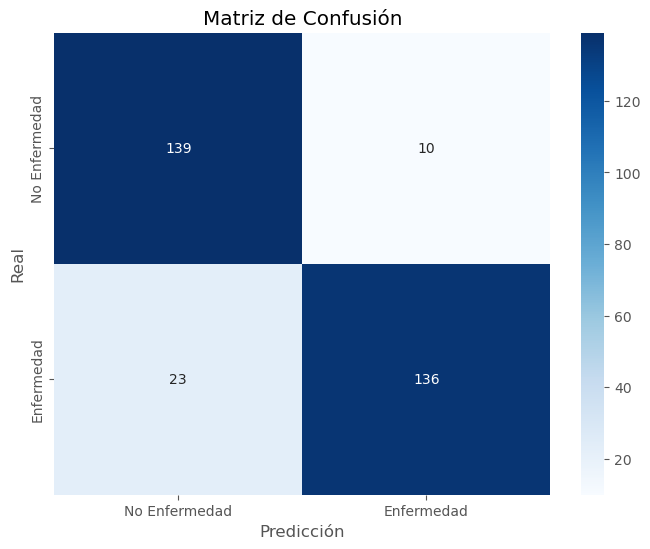

In [342]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Enfermedad', 'Enfermedad'],
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

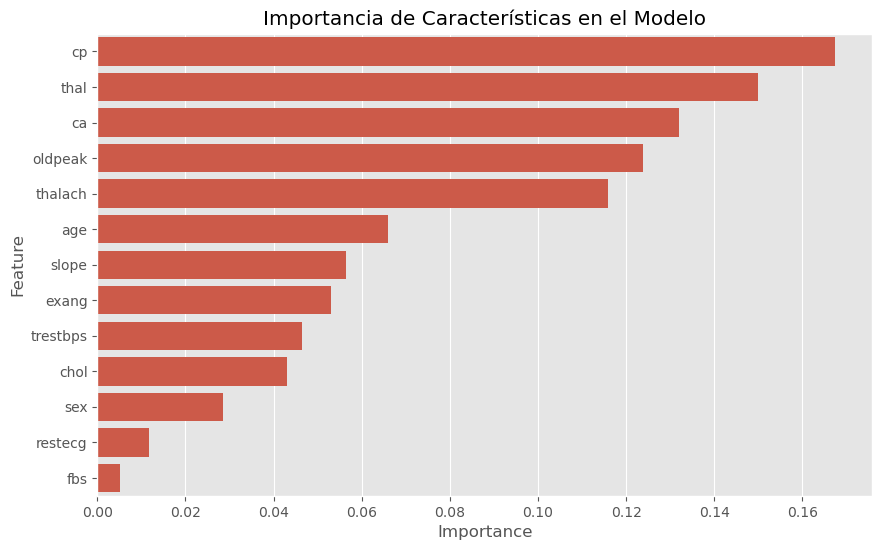

In [343]:
# 8. Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de Características en el Modelo')
plt.show()

Importar el Modelos PKL

In [344]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

# Guardar el modelo en un archivo .pkl
dump(clf, 'modelo_random.pkl')

['modelo_random.pkl']

In [345]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

# Guardar el modelo en un archivo .pkl
dump(rf_model, 'modelo_random_1.pkl')

['modelo_random_1.pkl']

In [346]:
import joblib
# Ejemplo con datos de un nuevo paciente
nuevos_datos = pd.DataFrame({
    'age': [58],  # Edad
    'sex': [1],    # 1 = masculino, 0 = femenino
    'cp': [2],     # Tipo de dolor torácico (1-4)
    'trestbps': [140],  # Presión arterial
    'chol': [240], # Colesterol
    'fbs': [0],    # Glucemia en ayunas (0/1)
    'restecg': [1],# Resultados ECG
    'thalach': [150], # Frecuencia cardíaca máxima
    'exang': [0],  # Angina inducida (0/1)
    'oldpeak': [1.2], # Depresión ST
    'slope': [2],  # Pendiente ST
    'ca': [1],     # Vasos principales (0-3)
    'thal': [2]    # Thal
})

# Asegurar mismo orden de columnas
nuevos_datos = nuevos_datos[X.columns]

In [347]:
prediccion = rf_model.predict(nuevos_datos)
probabilidad = rf_model.predict_proba(nuevos_datos)

print(f"Predicción: {'Enfermedad cardíaca' if prediccion[0] == 1 else 'Sin enfermedad'}")
print(f"Probabilidad: {probabilidad[0][1]*100:.2f}% de tener enfermedad cardíaca")

Predicción: Sin enfermedad
Probabilidad: 38.81% de tener enfermedad cardíaca


In [348]:
# Datos para varios pacientes (ejemplo)
pacientes = pd.DataFrame([
    [65, 1, 3, 120, 200, 0, 0, 130, 0, 0.0, 1, 0, 1],  # Paciente 1
    [45, 0, 2, 140, 280, 1, 1, 160, 1, 2.3, 2, 2, 2]   # Paciente 2
], columns=X.columns)

# Predicciones batch
predicciones = rf_model.predict(pacientes)
probabilidades = rf_model.predict_proba(pacientes)[:, 1]

resultados = pacientes.copy()
resultados['Prediccion'] = ['Enfermedad' if p == 1 else 'Sano' for p in predicciones]
resultados['Probabilidad'] = [f"{p*100:.1f}%" for p in probabilidades]

print("\nResultados para múltiples pacientes:")
print(resultados[['age', 'sex', 'Prediccion', 'Probabilidad']])


Resultados para múltiples pacientes:
   age  sex Prediccion Probabilidad
0   65    1       Sano        31.3%
1   45    0       Sano        37.7%


In [349]:
import joblib
import pandas as pd

def cargar_modelo(ruta_modelo="modelo_random.pkl"):
    """Carga el modelo entrenado desde un archivo .pkl"""
    try:
        modelo = joblib.load(ruta_modelo)
        print("Modelo cargado exitosamente")
        return modelo
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo {ruta_modelo}")
        return None
    except Exception as e:
        print(f"Error al cargar el modelo: {str(e)}")
        return None

def predecir_enfermedades_cardiacas(modelo):
    """Realiza predicciones sobre datos de pacientes"""
    # Datos de ejemplo para múltiples pacientes
    datos_pacientes = [
        [65, 1, 3, 120, 200, 0, 0, 130, 0, 0.0, 1, 0, 1],  # Paciente 1
        [45, 0, 2, 140, 280, 1, 1, 160, 1, 2.3, 2, 2, 2]    # Paciente 2
    ]
    
    # Columnas correspondientes a las características del modelo
    columnas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
    ]
    
    try:
        # Crear DataFrame con los datos
        pacientes = pd.DataFrame(datos_pacientes, columns=columnas)
        
        # Realizar predicciones
        predicciones = modelo.predict(pacientes)
        probabilidades = modelo.predict_proba(pacientes)[:, 1] * 100  # Convertir a porcentaje
        
        # Añadir resultados al DataFrame
        resultados = pacientes.copy()
        resultados['Predicción'] = ['Enfermedad' if p == 1 else 'Sano' for p in predicciones]
        resultados['Probabilidad (%)'] = probabilidades.round(2)
        
        return resultados
    
    except Exception as e:
        print(f"Error al realizar predicciones: {str(e)}")
        return None

if __name__ == "__main__":
    # Paso 1: Cargar el modelo
    modelo = cargar_modelo()
    
    if modelo is not None:
        # Paso 2: Realizar predicciones
        resultados = predecir_enfermedades_cardiacas(modelo)
        
        if resultados is not None:
            print("\nRESULTADOS DE PREDICCIÓN PARA PACIENTES")
            print("---------------------------------------")
            # Mostrar solo las columnas más relevantes para el reporte
            print(resultados[['age', 'sex', 'Predicción', 'Probabilidad (%)']])

Modelo cargado exitosamente

RESULTADOS DE PREDICCIÓN PARA PACIENTES
---------------------------------------
   age  sex Predicción  Probabilidad (%)
0   65    1       Sano              20.0
1   45    0       Sano              20.0


### Modelo Random Forest Características Reducidas

In [350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# 1. Selección de características importantes usando RandomForest
selector = RandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_train, y_train)

# Selecciona solo las características más importantes automáticamente
sfm = SelectFromModel(selector, threshold="mean")
X_train_reduced = sfm.fit_transform(X_train, y_train)
X_test_reduced = sfm.transform(X_test)

# 2. Búsqueda de mejores hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_reduced, y_train)

# 3. Entrenar el modelo final con mejores hiperparámetros y características seleccionadas
best_rf = grid.best_estimator_
best_rf.fit(X_train_reduced, y_train)

# 4. Evaluar el modelo
y_pred_reduced_RF = best_rf.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred_reduced_RF)
print(f"Precisión del modelo reducido: {accuracy*100:.2f}%")

if accuracy > 0.5:
    print("El modelo cumple con el requisito de precisión mayor al 50%.")
else:
    print("El modelo NO cumple con el requisito de precisión mayor al 50%.")

Precisión del modelo reducido: 97.08%
El modelo cumple con el requisito de precisión mayor al 50%.


In [351]:
print("Orden de clases en el modelo:", best_rf.classes_)
# Si muestra ['Disease', 'No Disease'], entonces:
# - [:, 0] es 'Disease'
# - [:, 1] es 'No Disease'

Orden de clases en el modelo: ['Disease' 'No Disease']


In [352]:
# imprimir mejores características
feature_importance_reduced = pd.DataFrame({
    'Feature': X_train.columns[sfm.get_support()],  
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print ("\nCaracterísticas más importantes:")
print(feature_importance_reduced)


Características más importantes:
   Feature  Importance
1       cp    0.161758
6     thal    0.157412
3  thalach    0.155907
4  oldpeak    0.155831
5       ca    0.140006
2     chol    0.117793
0      age    0.111293


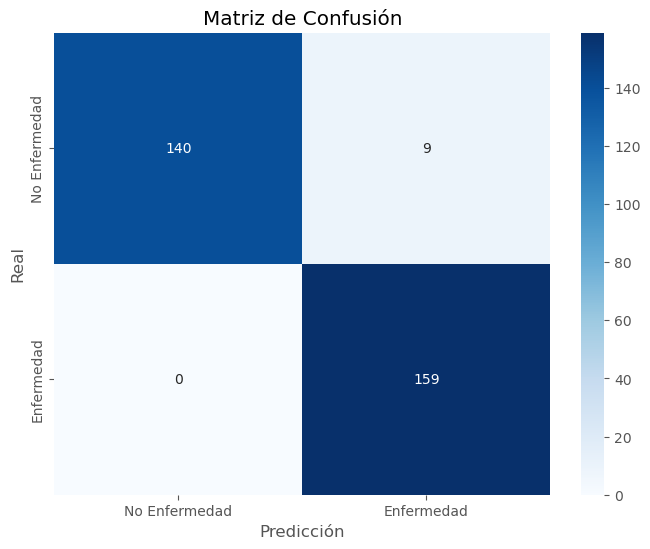

In [353]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Enfermedad', 'Enfermedad'],
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [354]:
# Datos para varios pacientes (ejemplo)
pacientes = pd.DataFrame([
    [65, 1, 3, 120, 200, 0, 0, 130, 0, 0.0, 1, 0, 1],  # Paciente 1
    [45, 0, 2, 140, 280, 1, 1, 160, 1, 2.3, 2, 2, 2]   # Paciente 2
], columns=X.columns)

# Reducir las características de los pacientes a las seleccionadas por sfm
pacientes_reduced = sfm.transform(pacientes)

# Predicciones batch
predicciones = best_rf.predict(pacientes_reduced)
probabilidades = best_rf.predict_proba(pacientes_reduced)[:, 1]

resultados = pacientes.copy()
resultados['Prediccion'] = ['Enfermedad' if p == 1 else 'Sano' for p in predicciones]
resultados['Probabilidad'] = [f"{p*100:.1f}%" for p in probabilidades]

print("\nResultados para múltiples pacientes:")
print(resultados[['age', 'sex', 'Prediccion', 'Probabilidad']])


Resultados para múltiples pacientes:
   age  sex Prediccion Probabilidad
0   65    1       Sano        27.0%
1   45    0       Sano        50.5%


In [355]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Guardar el modelo en un archivo .pkl
dump(best_rf, 'modelo_random_reducido.pkl')

['modelo_random_reducido.pkl']

### Modelo Redes Neuronales

In [356]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# 1. Preprocesamiento (escalado de características y codificación de etiquetas)
scaler = StandardScaler()
# Para modelo original (sin reducción)
X_train_scaled_full = scaler.fit_transform(X_train)
X_test_scaled_full = scaler.transform(X_test)

# Convertir etiquetas de texto a numéricas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Determinar si es problema binario o multiclase
num_classes = len(np.unique(y_train_encoded))
is_binary = num_classes == 2

# 2. Construir el modelo de red neuronal
modeloRN = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes if not is_binary else 1, 
                activation='softmax' if not is_binary else 'sigmoid')
])

# 3. Compilar el modelo
modeloRN.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy' if is_binary else 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Entrenamiento
callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
]

# Entrenamiento
history = modeloRN.fit(
    X_train_scaled_full, y_train_encoded,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# Evaluación
y_pred = modeloRN.predict(X_test_scaled_full)
if is_binary:
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()
else:
    y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir las predicciones numéricas de vuelta a las etiquetas originales
y_pred_labels = label_encoder.inverse_transform(y_pred_classes)

print("\nEvaluación del modeloRN:")
print(classification_report(y_test, y_pred_labels))

# 6. Guardar el modelo
modeloRN.save('modeloRN.h5')
print("Modelo guardado correctamente")

Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 0.6058 - accuracy: 0.7016 - val_loss: 0.5239 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8185 - val_loss: 0.4774 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8360 - val_loss: 0.4532 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8639 - val_loss: 0.4342 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8743 - val_loss: 0.4085 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2944 - accuracy: 0.8709 - val_loss: 0.3961 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2

#### Redes Neuronales con modelo reducido

In [357]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# 1. Preprocesamiento (escalado de características y codificación de etiquetas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir etiquetas de texto a numéricas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Codificar etiquetas si son strings
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 3. Selección de características con Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_encoded)

# Seleccionar características con importancia > 50%
selector = SelectFromModel(rf, threshold='median')  # median asegura >50% de importancia
selector.fit(X_train, y_train_encoded)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Se seleccionaron {X_train_selected.shape[1]} características de {X_train.shape[1]} originales")

# 4. Escalar características seleccionadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 5. Construir modelo mejorado
num_classes = len(np.unique(y_train_encoded))
is_binary = num_classes == 2

modeloRN_Reduced = keras.Sequential([
    layers.Input(shape=(X_train_selected.shape[1],)),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes if not is_binary else 1, 
                activation='softmax' if not is_binary else 'sigmoid')
])

# 6. Compilar con optimizador mejorado
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
modeloRN_Reduced.compile(
    optimizer=optimizer,
    loss='binary_crossentropy' if is_binary else 'sparse_categorical_crossentropy',
    metrics=['accuracy', 
             keras.metrics.Precision(),
             keras.metrics.Recall(),
             keras.metrics.AUC() if is_binary else keras.metrics.AUC(multi_label=True)]
)

# 7. Callbacks avanzados
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    mode='max'
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# 8. Entrenamiento con más épocas
history = modeloRN_Reduced.fit(
    X_train_scaled, y_train_encoded,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 9. Evaluación
y_pred_RNN = modeloRN_Reduced.predict(X_test_scaled)
if is_binary:
    y_pred_RNN_classes = (y_pred_RNN> 0.5).astype(int).flatten()
else:
    y_pred_RNN_classes = np.argmax(y_pred_RNN, axis=1)

y_pred_RNN_labels = label_encoder.inverse_transform(y_pred_RNN_classes)

print("\nEvaluación del modelo mejorado:")
print(classification_report(y_test, y_pred_labels))

# 10. Guardar modelo mejorado
modeloRN_Reduced.save('modeloRN_Reduced.h5')
print("Modelo mejorado guardado como 'modeloRN_Reduced.h5'")

# Guardar también el selector y scaler para uso futuro
import joblib
joblib.dump(selector, 'selector_caracteristicas.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

Se seleccionaron 7 características de 13 originales
Epoch 1/200
9/9 [==============================] - 1s 35ms/step - loss: 0.6519 - accuracy: 0.6475 - precision_11: 0.6282 - recall_11: 0.6374 - auc_11: 0.7010 - val_loss: 0.6367 - val_accuracy: 0.6597 - val_precision_11: 0.6000 - val_recall_11: 0.8060 - val_auc_11: 0.7673 - lr: 5.0000e-04
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.8220 - precision_11: 0.8202 - recall_11: 0.8022 - auc_11: 0.8860 - val_loss: 0.6079 - val_accuracy: 0.7222 - val_precision_11: 0.6709 - val_recall_11: 0.7910 - val_auc_11: 0.8003 - lr: 5.0000e-04
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3772 - accuracy: 0.8307 - precision_11: 0.8411 - recall_11: 0.7949 - auc_11: 0.9129 - val_loss: 0.5904 - val_accuracy: 0.7361 - val_precision_11: 0.7101 - val_recall_11: 0.7313 - val_auc_11: 0.8138 - lr: 5.0000e-04
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.3225 - acc

['label_encoder.pkl']

In [358]:
# Variables reducidas

caracteristicas_originales = X_train.columns  # si X_train es un DataFrame
mas_importantes = selector.get_support()      # arreglo de True/False

variables_reducidas = caracteristicas_originales[mas_importantes]
print("Variables seleccionadas:")
print(variables_reducidas)


Variables seleccionadas:
Index(['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


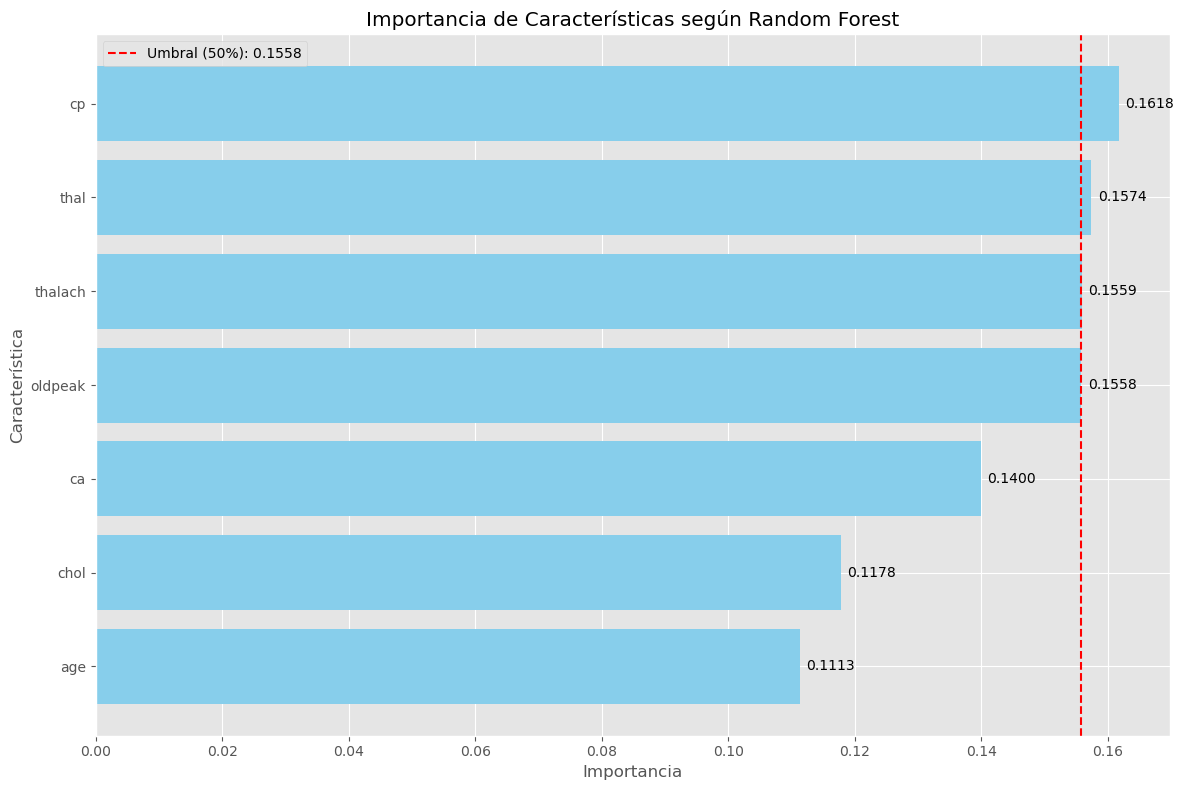

In [359]:
import matplotlib.pyplot as plt

# Crear df_importancia a partir de feature_importance_reduced
df_importancia = feature_importance_reduced.rename(
    columns={'Feature': 'Característica', 'Importance': 'Importancia'}
)

# Definir umbral (por ejemplo, la mediana de importancia)
umbral = df_importancia['Importancia'].median()

# Configurar estilo
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

# Gráfico de importancia
bars = plt.barh(df_importancia['Característica'][:12],  # Top 20 características
               df_importancia['Importancia'][:12],
               color='skyblue')

# Línea de umbral
plt.axvline(x=umbral, color='red', linestyle='--', label=f'Umbral (50%): {umbral:.4f}')

# Etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de Características según Random Forest')
plt.gca().invert_yaxis()  # Mostrar la más importante arriba

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}',
             ha='left', va='center')

plt.legend()
plt.tight_layout()
plt.show()

#### Comparación Modelos Redes Neuronales

#### RNN Reducido

In [360]:
# Seleccionar solo las características reducidas
pacientes_reduced = selector.transform(pacientes)

# Escalar los datos de los pacientes reducidos
pacientes_scaled = scaler.transform(pacientes_reduced)

# Realizar la predicción
y_pred_pacientes = modeloRN_Reduced.predict(pacientes_scaled)
y_pred_clases = (y_pred_pacientes > 0.5).astype(int).flatten()
y_pred_labels = label_encoder.inverse_transform(y_pred_clases)

# Mostrar resultados
for i, label in enumerate(y_pred_labels):
    print(f"Paciente {i+1}: {label} (Probabilidad: {y_pred_pacientes[i][0]*100:.1f}%)")

1/1 [==============================] - 0s 17ms/step
Paciente 1: Disease (Probabilidad: 8.7%)
Paciente 2: No Disease (Probabilidad: 63.2%)


### RNN 

In [361]:
# Escalar los datos de los pacientes con el scaler de todas las variables
pacientes_scaled_full = scaler_full.transform(pacientes)

# Realizar la predicción con el modelo de redes neuronales completo
y_pred_pacientes_full = modeloRN.predict(pacientes_scaled_full)
y_pred_clases_full = (y_pred_pacientes_full > 0.5).astype(int).flatten()
y_pred_labels_full = label_encoder.inverse_transform(y_pred_clases_full)

# Mostrar resultados
for i, label in enumerate(y_pred_labels_full):
    print(f"Paciente {i+1}: {label} (Probabilidad: {y_pred_pacientes_full[i][0]*100:.1f}%)")

1/1 [==============================] - 0s 18ms/step
Paciente 1: Disease (Probabilidad: 3.0%)
Paciente 2: Disease (Probabilidad: 21.5%)


## Evaluación Modelos

In [362]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 1. Red Neuronal Completa
#acc_rn = accuracy_score(y_test_encoded, y_pred_clases_full)
#f1_rn = f1_score(y_test_encoded, y_pred_clases_full)
#auc_rn = roc_auc_score(y_test_encoded, y_pred.flatten())
#print(f"Red Neuronal Completa - Accuracy: {acc_rn:.4f}, F1: {f1_rn:.4f}, AUC: {auc_rn:.4f}")

# 2. Random Forest Completo
#y_test_bin = (y_test == 'Disease').astype(int)
#y_pred_rf = (y_pred == 'Disease').astype(int)
#rf_proba = rf_model.predict_proba(X_test)[:,1]
#acc_rf = accuracy_score(y_test_bin, y_pred_rf)
#f1_rf = f1_score(y_test_bin, y_pred_rf)
#auc_rf = roc_auc_score(y_test_bin, rf_proba)
#print(f"Random Forest Completo - Accuracy: {acc_rf:.4f}, F1: {f1_rf:.4f}, AUC: {auc_rf:.4f}")

# 3. Random Forest Reducido
y_pred_rf_reduced = (y_pred_reduced == 'Disease').astype(int)
rf_reduced_proba = best_rf.predict_proba(X_test_reduced)[:,1]
acc_rf_red = accuracy_score(y_test_bin, y_pred_rf_reduced)
f1_rf_red = f1_score(y_test_bin, y_pred_rf_reduced)
auc_rf_red = roc_auc_score(y_test_bin, rf_reduced_proba)
print(f"Random Forest Reducido - Accuracy: {acc_rf_red:.4f}, F1: {f1_rf_red:.4f}, AUC: {auc_rf_red:.4f}")

# 4. Red Neuronal Reducida
acc_rn_red = accuracy_score(y_test_encoded, y_pred_classes)
f1_rn_red = f1_score(y_test_encoded, y_pred_classes)
auc_rn_red = roc_auc_score(y_test_encoded, y_pred.flatten())
print(f"Red Neuronal Reducida - Accuracy: {acc_rn_red:.4f}, F1: {f1_rn_red:.4f}, AUC: {auc_rn_red:.4f}")

Random Forest Reducido - Accuracy: 0.9708, F1: 0.9689, AUC: 0.0018
Red Neuronal Reducida - Accuracy: 0.8571, F1: 0.8571, AUC: 0.9545


In [366]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

# Convertir etiquetas reales a binario
y_test_bin = (y_test == 'Disease').astype(int)

### 1. Red Neuronal Completa
# Usa las clases predichas por la red neuronal completa
acc_rn = accuracy_score(y_test_encoded, y_pred_classes)
f1_rn = f1_score(y_test_encoded, y_pred_classes)
auc_rn = roc_auc_score(y_test_encoded, y_pred.flatten())  # y_pred son probabilidades
print(f"Red Neuronal Completa - Accuracy: {acc_rn:.4f}, F1: {f1_rn:.4f}, AUC: {auc_rn:.4f}")

### 2. Random Forest Completo
# Usa las predicciones del modelo Random Forest para todo el test set
# y_pred_rf is already an array of 0 and 1, so no need to convert
rf_proba = rf_model.predict_proba(X_test)[:, 0]
acc_rf = accuracy_score(y_test_bin, y_pred_rf)
f1_rf = f1_score(y_test_bin, y_pred_rf)
auc_rf = roc_auc_score(y_test_bin, rf_proba)
print(f"Random Forest Completo - Accuracy: {acc_rf:.4f}, F1: {f1_rf:.4f}, AUC: {auc_rf:.4f}")

### 3. Random Forest Reducido
y_pred_rf_reduced = (y_pred_reduced_RF == 'Disease').astype(int)
rf_reduced_proba = best_rf.predict_proba(X_test_reduced)[:, 0]
acc_rf_red = accuracy_score(y_test_bin, y_pred_rf_reduced)
f1_rf_red = f1_score(y_test_bin, y_pred_rf_reduced)
auc_rf_red = roc_auc_score(y_test_bin, rf_reduced_proba)
print(f"Random Forest Reducido - Accuracy: {acc_rf_red:.4f}, F1: {f1_rf_red:.4f}, AUC: {auc_rf_red:.4f}")

### 4. Red Neuronal Reducida
acc_rn_red = accuracy_score(y_test_encoded, y_pred_RNN_classes)
f1_rn_red = f1_score(y_test_encoded, y_pred_RNN_classes)
auc_rn_red = roc_auc_score(y_test_encoded, y_pred_RNN.flatten())  # usa las probabilidades para AUC
print(f"Red Neuronal Reducida - Accuracy: {acc_rn_red:.4f}, F1: {f1_rn_red:.4f}, AUC: {auc_rn_red:.4f}")


Red Neuronal Completa - Accuracy: 0.8571, F1: 0.8571, AUC: 0.9545
Random Forest Completo - Accuracy: 0.8929, F1: 0.8939, AUC: 0.9744
Random Forest Reducido - Accuracy: 0.9708, F1: 0.9689, AUC: 0.9982
Red Neuronal Reducida - Accuracy: 0.7955, F1: 0.7948, AUC: 0.9109
